# Сравнительный анализ трех ПМИ#

В этом исследовании мы сравним баллы ЕГЭ абитуриентов трех направлений подготовки программистов в Москве:


*   Прикладная математика и информатика факультета компьютерных наук Высшей Школы Экономики (далее "Вышка")
*   Прикладная математика и информатика фаультета вычислительной математики и кибернетики Московского Государственного Университета (далее "ВМК")
* Прикладная математика и информатика факультета инноваций и высоких технологий Московского физико-технического института (далее "физтех")

Данные (за 2018 год) были взяты с официальных сайтов приемных комиссий путем копирования таблиц в текстовые файлы (никакого парсинга).




In [1]:
#Загрузка библиотек
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.offline as py
from plotly import tools
import plotly.graph_objs as go
import plotly.io as pio
import scipy.signal
sns.set()

from IPython.display import Image

  
import warnings
warnings.filterwarnings('ignore')

# Загрузка данных##

In [2]:
hse = pd.read_csv('~/data/сравнение_пми/пми.txt', sep = '\t', header = -1)
hse.columns = ['Name', 'Math', 'IT', 'Russian language', 'Achievements', 'Total']
hse.sort_values(by = ['Total'], axis = 0, inplace = True, ascending = False)
hse.drop_duplicates(inplace = True)
hse.reset_index(inplace = True, drop = True)
print('Вышка:\nКол-во абитуриентов: ', hse.shape[0])
hse.head()

Вышка:
Кол-во абитуриентов:  510


,Name,Math,IT,Russian language,Achievements,Total
0,Сендерович Александра Леонидовна,100,100,100,10.0,310
1,Царева Юлия Сергеевна,100,100,100,10.0,310
2,Казаков Кирилл Евгеньевич,100,100,98,10.0,308
3,Коган Александра Сергеевна,100,100,98,10.0,308
4,Клочко Анастасия Алексеевна,100,97,100,10.0,307


In [3]:
msu_first = pd.read_csv('~/data/сравнение_пми/вмк.txt', sep = '\t', header = -1)
msu_second = pd.read_csv('~/data/сравнение_пми/вмк2.txt', sep = '\t', header = -1)

msu_first.drop([0, 2, 12, 13], axis = 1, inplace = True)
msu_first['Achievments'] = msu_first[9] + msu_first[10] + msu_first[11]
msu_first['Total'] = msu_first[3]
msu_first.drop([3, 9, 10, 11], axis = 1, inplace = True)

msu_second.drop([0, 2, 3, 4, 14, 15], axis = 1, inplace = True)
msu_second['Achievments'] = msu_second[11] + msu_second[12] + msu_second[13]
msu_second['Total'] = msu_second[5]
msu_second.drop([5, 11, 12, 13], axis = 1, inplace = True)

msu_first.columns = ['Name', 'Additional math', 'Math', 'Physics', 'IT', 'Russian language', 'Achievements', 'Total']
msu_second.columns = ['Name', 'Additional math', 'Math', 'Physics', 'IT', 'Russian language', 'Achievements', 'Total']
msu = pd.concat([msu_first, msu_second], axis = 0, sort = False)

msu.sort_values(by = ['Total'], axis = 0, inplace = True, ascending = False)
msu.drop_duplicates(inplace = True)
msu['Name'] = msu['Name'].apply(lambda x: str(x).title())
msu.reset_index(inplace = True, drop = True)

msu = msu[:515]

print('ВМК:\nКол-во абитуриентов: ', msu.shape[0], '\nВообще-то их было больше, но анализировать всех смысла нет.')

msu.head()

ВМК:
Кол-во абитуриентов:  515 
Вообще-то их было больше, но анализировать всех смысла нет.


,Name,Additional math,Math,Physics,IT,Russian language,Achievements,Total
0,Орлов Сергей Леонидович,100,100,100,100,94,9,503
1,Мальцев Михаил Витальевич,100,100,100,100,94,7,501
2,Сендерович Александра Леонидовна,100,98,94,100,100,8,500
3,Клочко Анастасия Алексеевна,100,98,98,97,100,7,500
4,Гулевич Дмитрий Сергеевич,100,98,100,97,98,7,500


In [4]:
mipt = pd.read_csv('~/data/сравнение_пми/фивт.txt', sep = ' ', header = -1)
mipt.drop([0, 1, 10], axis = 1, inplace = True)
mipt['Name'] = mipt[2] + ' ' + mipt[3] + ' ' + mipt[4]
mipt['Math'] = mipt[5]
mipt['IT'] = mipt[6]
mipt['Russian language'] = mipt[7]
mipt['Achievements'] = mipt[8]
mipt['Total'] = mipt[9]
mipt.drop([2, 3, 4, 5, 6, 7, 8, 9], axis = 1, inplace = True)

mipt.drop_duplicates(inplace = True)
mipt.sort_values(by = ['Total'], axis = 0, inplace = True, ascending = False)
mipt.reset_index(inplace = True, drop = True)

print('Физтех:\nКол-во абитуриентов: ', mipt.shape[0])

mipt.head()

Физтех:
Кол-во абитуриентов:  520


,Name,Math,IT,Russian language,Achievements,Total
0,Васильев Игорь Николаевич,100,100,98,10,308
1,Смаль Денис Алексеевич,100,100,98,10,308
2,Жуков Павел Эдуардович,100,100,98,10,308
3,Алекберов Артем Темурович,100,100,98,10,308
4,Зименков Александр Владимирович,100,100,98,9,307


# Анализ общих баллов##

Сравним баллы ЕГЭ всех абитуриентов, учитывая их места в рейтингах.

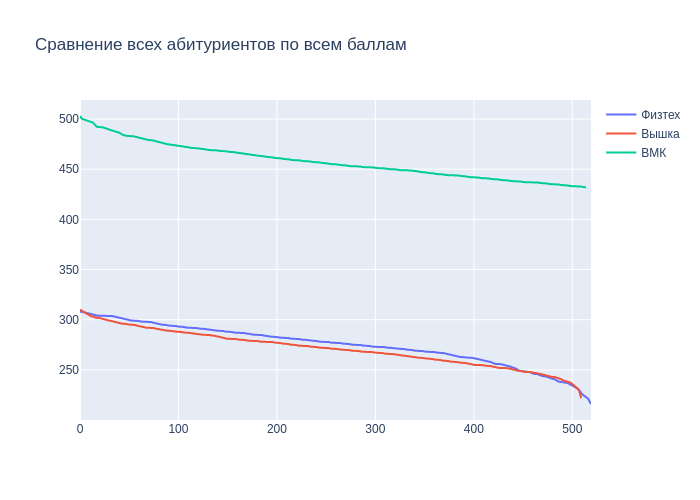

In [5]:
py.init_notebook_mode(connected=True)
trace_mipt = go.Scatter(x = mipt.index, y = scipy.signal.savgol_filter(mipt.Total, 7, 3), name = 'Физтех')
trace_hse = go.Scatter(x = hse.index, y = scipy.signal.savgol_filter(hse.Total, 7, 3), name = 'Вышка')
trace_msu = go.Scatter(x = msu.index, y = scipy.signal.savgol_filter(msu.Total, 7, 3), name = 'ВМК')
data = [trace_mipt, trace_hse, trace_msu]
layout = go.Layout(title = 'Сравнение всех абитуриентов по всем баллам', width = 700, height = 500)
fig = go.Figure(data = data, layout = layout)
Image(pio.to_image(fig, format='png'))

(график сглаженный)

Линия ВМК получилась выше, так как для поступления туда необходимо сдавать пять экзаменов вместо трех, таким образом, и баллов можно получить больше. Чтобы оценка получилась справедливой, нужно сравнивать абитуриентов только по баллам за экзамены по русскому языку, информатике и математике, так как их сдают все. Баллы за индивидуальные достижения учитывать также не будем, поскольку разные вузы выставляют их по-разному.

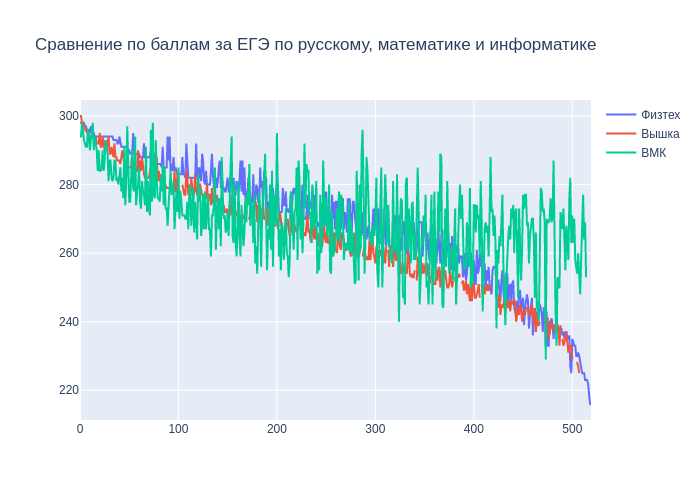

In [6]:
trace_mipt = go.Scatter(x = mipt.index, y = mipt.Total - mipt.Achievements, name = 'Физтех')
trace_hse = go.Scatter(x = hse.index, y = hse.Total - hse.Achievements, name = 'Вышка')
trace_msu = go.Scatter(x = msu.index, y = msu.Total - msu.Achievements - msu.Physics - msu['Additional math'], name = 'ВМК')
data = [trace_mipt, trace_hse, trace_msu]
layout = go.Layout(title = 'Сравнение по баллам за ЕГЭ по русскому, математике и информатике', width = 700, height = 500)
fig = go.Figure(data = data, layout = layout)
Image(pio.to_image(fig, format='png'))

Результат ожидаемый - поскольку для вышки и физтеха показанные три экзамена являются единственными, их линии идут вниз, причем линия физтеха выше (что было видно и на предыдущем графике). В то же время, для ВМК многое решают физика и ДВИ, а потому линия ВМК колеблется.
Для получения красивых результатов придется отсортировать абитуриентов не по месту в рейтинге вуза, а по баллам за математику/русский/информатику (а еще не будем сглаживать график и просто потерпим его уродливость).

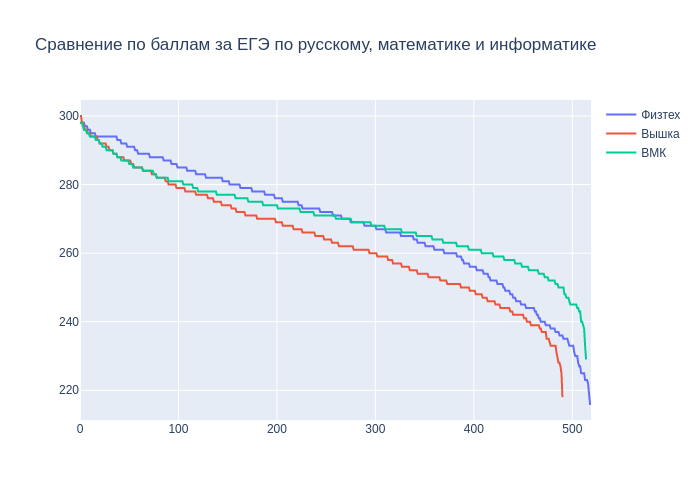

In [7]:
mipt_line = (mipt.Total - mipt.Achievements).sort_values(ascending = False)
hse_line = (hse.Total - hse.Achievements).sort_values(ascending = False)
msu_line = (msu.Total - msu.Achievements - msu.Physics - msu['Additional math']).sort_values(ascending = False)


trace_mipt = go.Scatter(x = mipt.index, y = mipt_line, name = 'Физтех')
trace_hse = go.Scatter(x = hse.index, y = hse_line, name = 'Вышка')
trace_msu = go.Scatter(x = msu.index, y = msu_line, name = 'ВМК')
data = [trace_mipt, trace_hse, trace_msu]
layout = go.Layout(title = 'Сравнение по баллам за ЕГЭ по русскому, математике и информатике', width = 700, height = 500)
fig = go.Figure(data = data, layout = layout)
Image(pio.to_image(fig, format='png'))

Удивительно! Баллы на ВМК выше, чем у Вышки!
Однако, известно, что ВМК принимает гораздо больше людей, чем аналогичные факультеты. Для справедливости необходимо построить аналогичные графики только для тех, кого вуз готов зачислить. 

Поэтому возьмем только первых 50 человек.



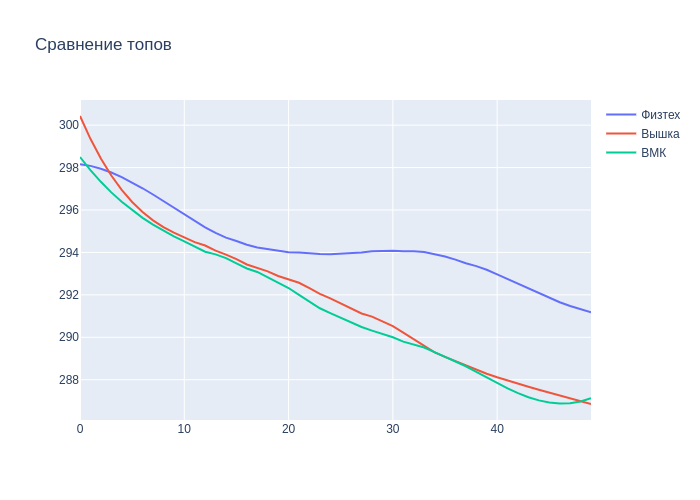

In [8]:
mipt_line = scipy.signal.savgol_filter((mipt.Total - mipt.Achievements).sort_values(ascending = False)[:50], 21, 3)
hse_line = scipy.signal.savgol_filter((hse.Total - hse.Achievements).sort_values(ascending = False)[:50], 21, 3)
msu_line = scipy.signal.savgol_filter((msu.Total - msu.Achievements - msu.Physics - msu['Additional math']).sort_values(ascending = False)[:50], 21, 3)


trace_mipt = go.Scatter(x = mipt.index, y = mipt_line, name = 'Физтех')
trace_hse = go.Scatter(x = hse.index, y = hse_line, name = 'Вышка')
trace_msu = go.Scatter(x = msu.index, y = msu_line, name = 'ВМК')
data = [trace_mipt, trace_hse, trace_msu]
layout = go.Layout(title = 'Сравнение топов', width = 700, height = 500)
fig = go.Figure(data = data, layout = layout)
Image(pio.to_image(fig, format='png'))

Вот из этого графика уже хорошо видна трагическая правда о том, что топы ВМК все же слабее абитуриентов на аналогичных позициях физтеха и вышки.

Наконец, построим диаграмму распределения баллов среди топов-абитуриентов.

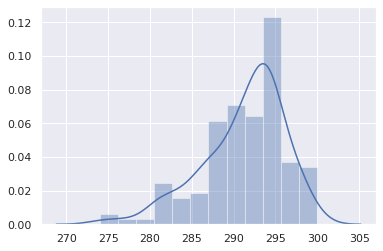

In [9]:
mipt_tops = (mipt.Total - mipt.Achievements)[:50]
hse_tops = (hse.Total - hse.Achievements)[:50]
msu_tops = (msu.Total - msu.Achievements - msu.Physics - msu['Additional math'])[:50]
tops = mipt_tops.append(hse_tops.append(msu_tops))
sns.distplot(tops)

Как нетрудно заметить, основная масса абитуриентов приходится на людей, набравших порядка 294 баллов.

Итак, что мы выяснили:

*   Самые крутые абитуриенты на физтехе.
*   Несмотря на то, что ВМК выигрывает у Вышки на длинной дистанции, топы вышки все равно сильнее.

Пора переходить к анализу отдельных аспектов!



# Анализ отдельных предметов##
Все дальнейшие рассуждения будут проводиться для "топов", то есть первых 50 абитуриентов каждой программы.

In [10]:
mipt_russian = mipt['Russian language'][:50]
msu_russian = msu['Russian language'][:50]
hse_russian = hse['Russian language'][:50]

mipt_math = mipt['Math'][:50]
msu_math = msu['Math'][:50]
hse_math = hse['Math'][:50]

mipt_it = mipt['IT'][:50]
msu_it = msu['IT'][:50]
hse_it = hse['IT'][:50]

mipt_id = mipt['Achievements'][:50]
msu_id = msu['Achievements'][:50]
hse_id = hse['Achievements'][:50]

msu_physics = msu['Physics'][:50]
msu_add = msu['Additional math'][:50]

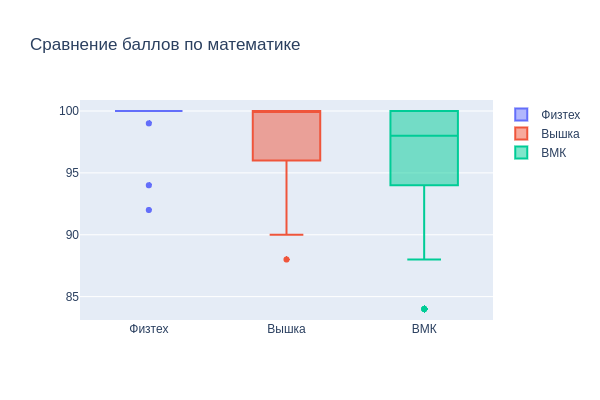

In [11]:
trace_mipt = go.Box(y = mipt_math, name = 'Физтех')
trace_hse = go.Box(y = hse_math, name = 'Вышка')
trace_msu = go.Box(y = msu_math, name = 'ВМК')
data = [trace_mipt, trace_hse, trace_msu]
layout = go.Layout(title = 'Сравнение баллов по математике', width = 600, height = 400)
fig = go.Figure(data = data, layout = layout)
Image(pio.to_image(fig, format='png'))

Стоит обсудить немного подробнее, как же понимать этот график (box plot). Далее цитата из [статьи ODS](https://habr.com/ru/company/ods/blog/323210/).

"Box plot состоит из коробки (поэтому он и называется box plot), усиков и точек. Коробка показывает интерквартильный размах распределения, то есть соответственно 25% (Q1) и 75% (Q3) перцентили. Черта внутри коробки обозначает медиану распределения.
С коробкой разобрались, перейдем к усам. Усы отображают весь разброс точек кроме выбросов, то есть минимальные и максимальные значения, которые попадают в промежуток (Q1 - 1.5*IQR, Q3 + 1.5*IQR), где IQR = Q3 - Q1 — интерквартильный размах. Точками на графике обозначаются выбросы (outliers) — те значения, которые не вписываются в промежуток значений, заданный усами графика."


Для понимания лучше один раз увидеть, поэтому вот еще и картинка из той же статьи:
![alt text](https://habrastorage.org/files/d0f/f53/8d5/d0ff538d59154901b18a98469de07fde.png)

Таким образом, становится понятно, что абитуриенты физтеха настолько круты, что все как один набирают по 100 баллов за ЕГЭ по математике (или берут олимпиады).

Аналогично проанализируем остальные предметы.

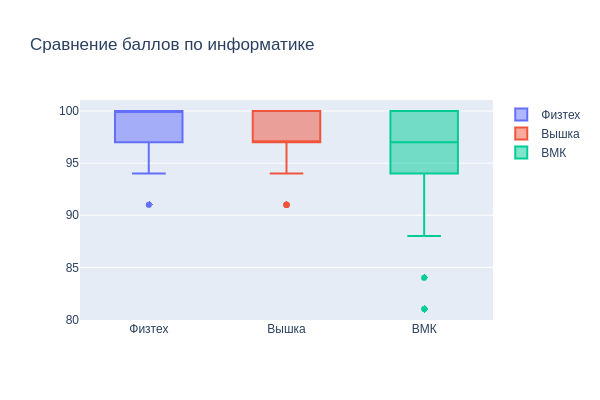

In [12]:
trace_mipt = go.Box(y = mipt_it, name = 'Физтех')
trace_hse = go.Box(y = hse_it, name = 'Вышка')
trace_msu = go.Box(y = msu_it, name = 'ВМК')
data = [trace_mipt, trace_hse, trace_msu]
layout = go.Layout(title = 'Сравнение баллов по информатике', width = 600, height = 400)
fig = go.Figure(data = data, layout = layout)
Image(pio.to_image(fig, format='png'))

Выходит, что самые лучшие кодеры собираются в Вышке.

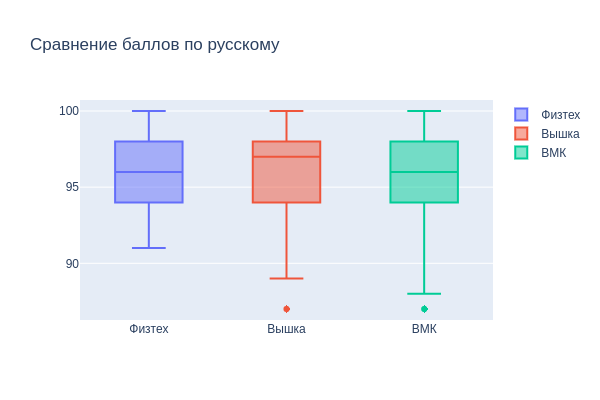

In [13]:
trace_mipt = go.Box(y = mipt_russian, name = 'Физтех')
trace_hse = go.Box(y = hse_russian, name = 'Вышка')
trace_msu = go.Box(y = msu_russian, name = 'ВМК')
data = [trace_mipt, trace_hse, trace_msu]
layout = go.Layout(title = 'Сравнение баллов по русскому', width = 600, height = 400)
fig = go.Figure(data = data, layout = layout)
Image(pio.to_image(fig, format='png'))

А вот русский все знают примерно одинаково.

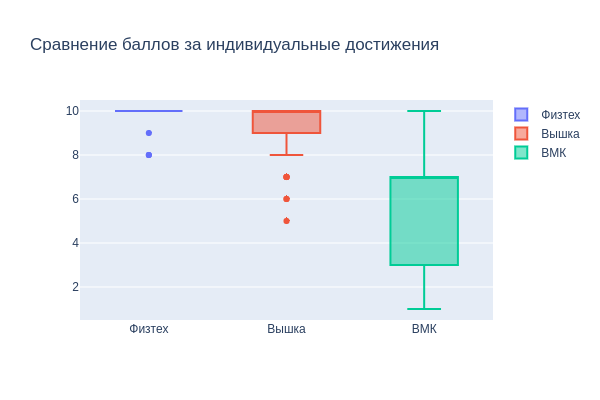

In [14]:
trace_mipt = go.Box(y = mipt_id, name = 'Физтех')
trace_hse = go.Box(y = hse_id, name = 'Вышка')
trace_msu = go.Box(y = msu_id, name = 'ВМК')
data = [trace_mipt, trace_hse, trace_msu]
layout = go.Layout(title = 'Сравнение баллов за индивидуальные достижения', width = 600, height = 400)
fig = go.Figure(data = data, layout = layout)
Image(pio.to_image(fig, format='png'))

Здесь совсем интересно. Судя по графику, в физтех без десятки за ИД лучше вообще не лезть, в Вышке ситуация похожая, а вот на ВМК высокие баллы не дают почти никому.

Посмотрим теперь на баллы ВМКшников по физике и ДВИ.

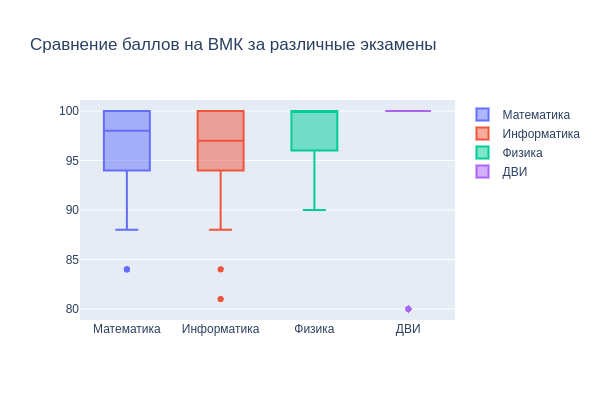

In [15]:
trace_math = go.Box(y = msu_math, name = 'Математика')
trace_it = go.Box(y = msu_it, name = 'Информатика')
trace_phys = go.Box(y = msu_physics, name = 'Физика')
trace_add = go.Box(y = msu_add, name = 'ДВИ')
data = [trace_math, trace_it, trace_phys, trace_add]
layout = go.Layout(title = 'Сравнение баллов на ВМК за различные экзамены', width = 600, height = 400)
fig = go.Figure(data = data, layout = layout)
Image(pio.to_image(fig, format='png'))

Как видно, физику в целом сдают неплохо, а также нам стало понятно, почему же ВМК отстает в баллах по математике - дело в том, что если олимпиадникам на физтехе и в вышке дают сотку за ЕГЭ, то на ВМК сотку дают за БВИ. Именно поэтому на приведенном графике у 49 ВМКшников из 50 за ДВИ сто баллов.
Таким образом, можно сказать, что наш предыдущий анализ баллов был не совсем корректен.

Итак, что мы выяснили:

*   На физтехе и ВМК сплошные олимпиадники по математике.
*   Информатику и русский сдают примерно одинаково.
*  На ВМК высокие баллы за ИД зажимают.



# Сравнение баллов за различные предметы##
Будет интересно посмотреть, для какого предмета наиболее велик шанс получить сотку, а где знания большинства проседают.

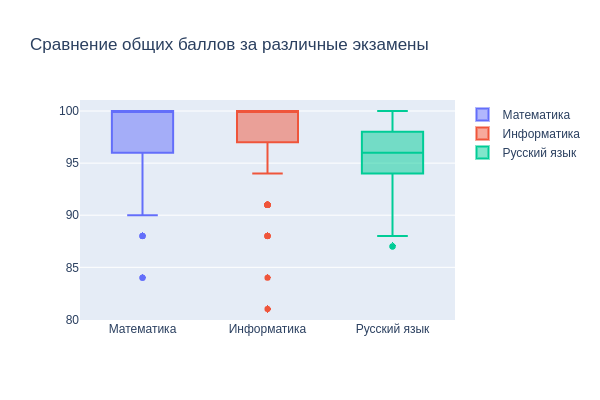

In [16]:
russian = mipt_russian.append(hse_russian).append(msu_russian)
it = mipt_it.append(hse_it).append(msu_it)
math = mipt_math.append(hse_math).append(msu_math)

trace_math = go.Box(y = math, name = 'Математика')
trace_it = go.Box(y = it, name = 'Информатика')
trace_russian = go.Box(y = russian, name = 'Русский язык')
data = [trace_math, trace_it, trace_russian]
layout = go.Layout(title = 'Сравнение общих баллов за различные экзамены', width = 600, height = 400)
fig = go.Figure(data = data, layout = layout)
Image(pio.to_image(fig, format='png'))

Отсюда хорошо видно, что из рассматриваемых предметов проще всего информатика.

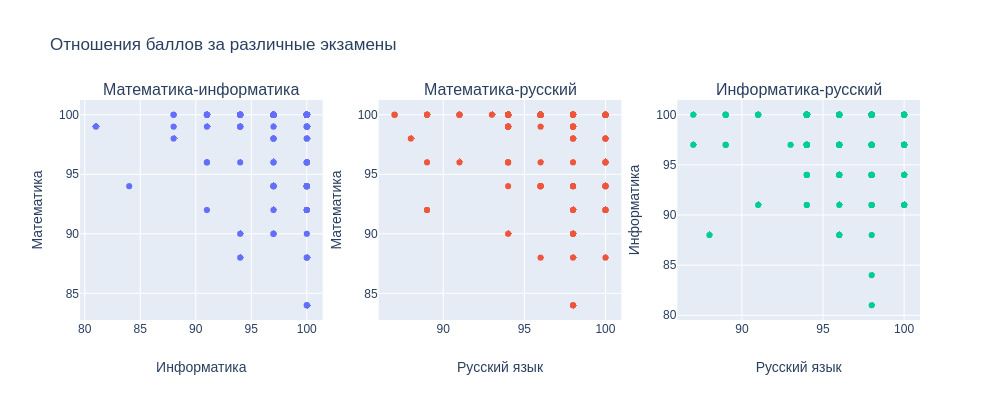

In [17]:
trace1 = go.Scatter(x = it, y = math, mode = 'markers')
trace2 = go.Scatter(x = russian, y = math, mode = 'markers')
trace3 = go.Scatter(x = russian, y = it, mode = 'markers')

fig = tools.make_subplots(rows=1, cols=3, subplot_titles=('Математика-информатика', 'Математика-русский', 'Информатика-русский'))
fig.append_trace(trace1, 1, 1)
fig.append_trace(trace2, 1, 2)
fig.append_trace(trace3, 1, 3)

fig['layout']['xaxis1'].update(title='Информатика')
fig['layout']['xaxis2'].update(title='Русский язык')
fig['layout']['xaxis3'].update(title='Русский язык')

fig['layout']['yaxis1'].update(title='Математика')
fig['layout']['yaxis2'].update(title='Математика')
fig['layout']['yaxis3'].update(title='Информатика')

fig['layout'].update(width = 1000, height = 400, showlegend = False, title='Отношения баллов за различные экзамены')
Image(pio.to_image(fig, format='png'))

Что мы можем сказать, взглянув на эти графики? Да ничего.

# Вывод##

Вывода не будет, а кто прочитал - тот сдохнет.